# Assignment_2_Campus_Placement

**Name**: Ajay Kumar  
**Student ID**: C0942384


Importing All Libraries

In [188]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score,f1_score

loading the dataset

In [189]:
df=pd.read_csv("train.csv")

Checking the data

In [190]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##  Examining the dataset

In [191]:
df.info()   # getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


## Checking the null Values

In [192]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Salary columnn has 67 null values. We will fill them as 0 becouse not placed candidate have 0 salary.

In [193]:
df['salary'].fillna(value=0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13572\2552236052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(value=0, inplace=True)


In [194]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Now no null Values

## Now drop unneccessary columns like serial number, ssc and hsc board

In [195]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Checking the data type in each column

In [196]:
column=df.select_dtypes(include=['object'])
for col in column:
    display(df[col].value_counts())

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

workex
No     141
Yes     74
Name: count, dtype: int64

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# Outliers: Checking the outliers

Text(0.5, 1.0, 'Employability percentage')

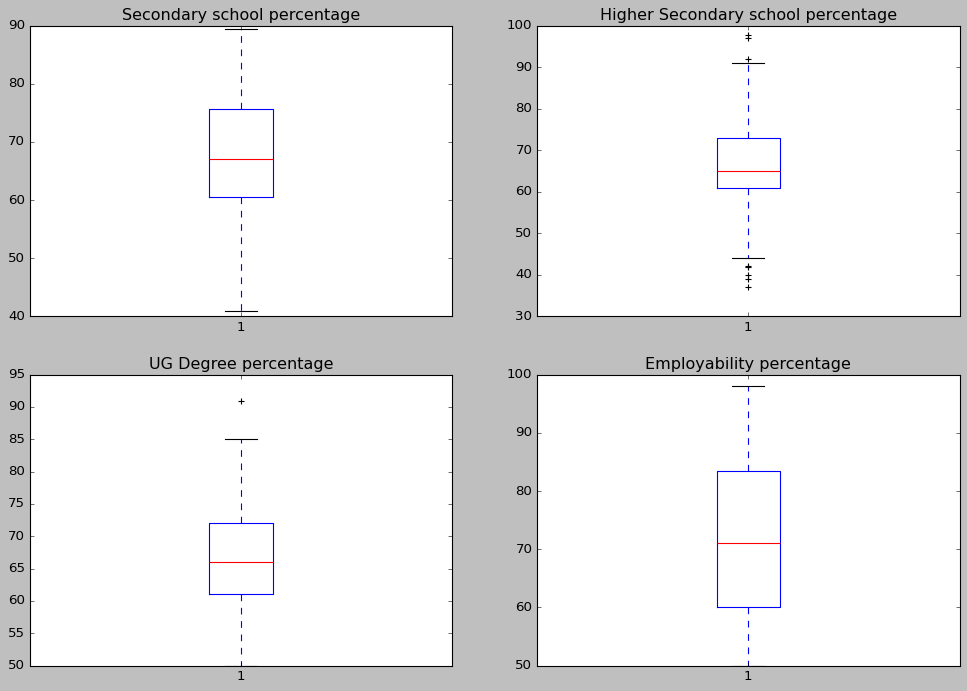

In [197]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-v0_8-pastel')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

'Higher Secondary school percentage has some outliers. We will filter them usimg IQR method.

In [198]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
df_1=df.loc[filter]



# EDA: Checing the influence of Work experience on placement

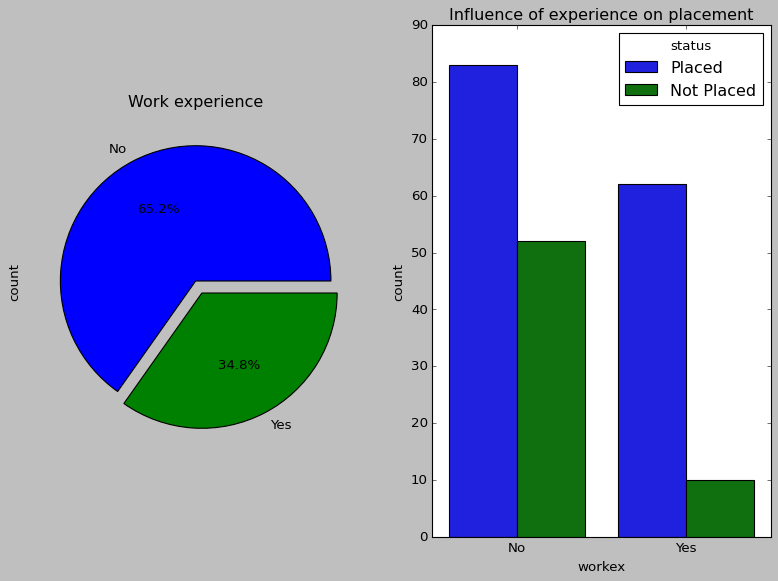

In [199]:
plt.style.use('classic')
f, ax = plt.subplots(1, 2, figsize=(12, 8))
                                                                        # Plot pie chart for 'workex' value counts
df_1['workex'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Work experience')
                                                                    # Plot countplot for 'workex' vs 'status'
sns.countplot(x='workex', hue='status', data=df_1, ax=ax[1])
ax[1].set_title('Influence of experience on placement')
# Show the plots
plt.show()

- Approximately 65.2% of candidates have no prior work experience.
- Interestingly, candidates without work experience have been hired more frequently than those with experience.

In [200]:
df_1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Creating a copy of the dstaset

In [201]:
df1 = df_1.copy()

Drop Salary column for modeling

In [202]:
df1.drop(['salary'],axis = 1,inplace = True)

In [203]:
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Encode column values using map function

In [204]:
df1['status']= df1['status'].map({'Placed':1,'Not Placed':0})
df1['workex']= df1['workex'].map({'Yes':1,'No':0})
df1['degree_t']= df1['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
df1['specialisation']= df1['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
df1['hsc_s']= df1['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2}) 

# encoded all the columns that have text data into numeric data for model training

In [205]:
df1.head()  # cheking data


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,0,0,55.0,1,58.80,1
1,0,79.33,78.33,1,77.48,0,1,86.5,0,66.28,1
2,0,65.00,68.00,2,64.00,1,0,75.0,0,57.80,1
3,0,56.00,52.00,1,52.00,0,0,66.0,1,59.43,0
4,0,85.80,73.60,0,73.30,1,0,96.8,0,55.50,1


# Correlation Between Columns

<Axes: >

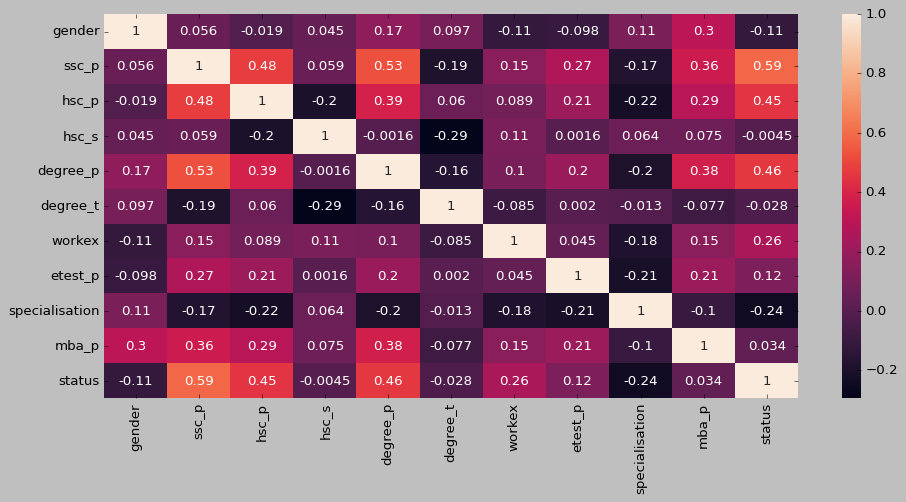

In [206]:
cor=df1.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

## High percentage in school and college and test have good correlation with status of being placed

Distribution of data

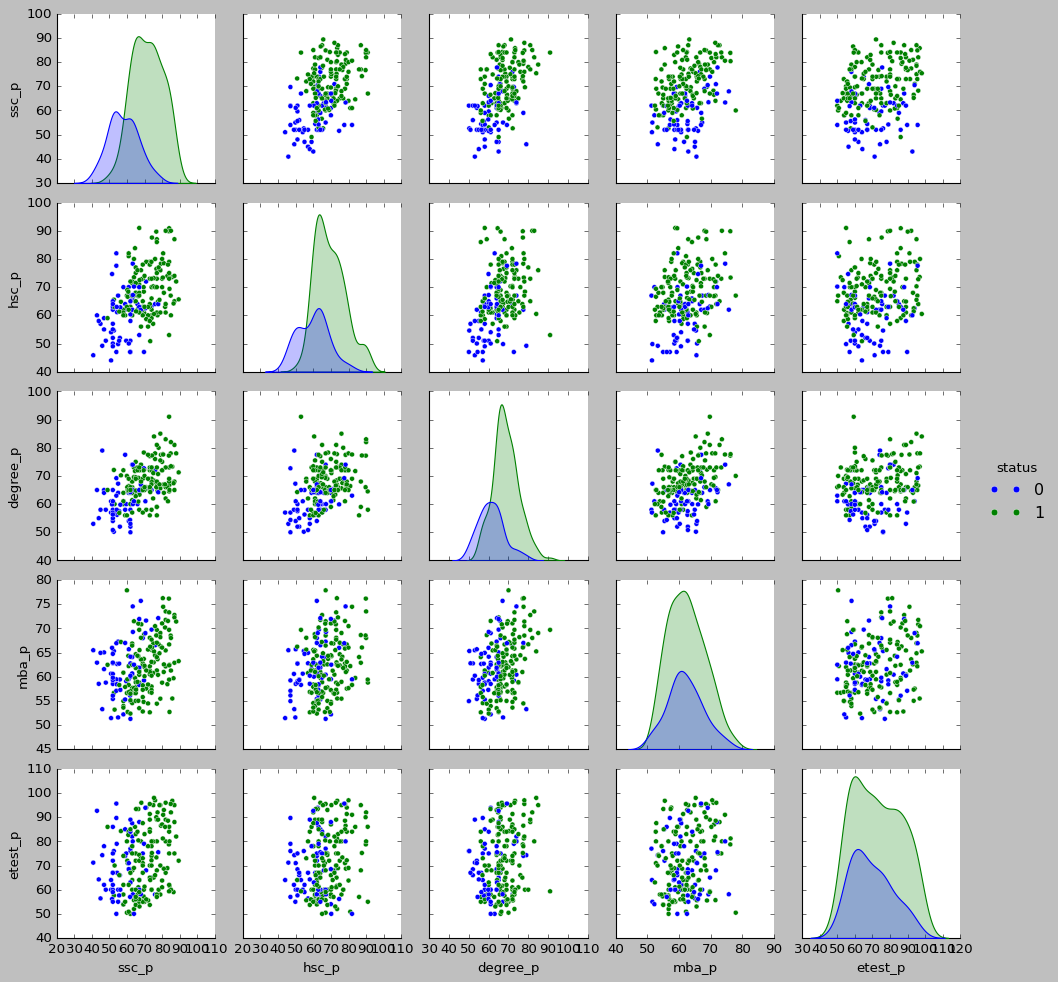

In [207]:
sns.pairplot(df1,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

- 1 is placed and 0 is not placed
- Candidates who has high score marks percentage  got placed

# Model Building

In [208]:
X=df1.drop(['status'],axis=1)  # Creating X and y(target) for model building
y = df1['status']

## Split the data into train and test sets(70:30)

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)  # we choose random state 3

## scale the dataset

In [210]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [211]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)   # fit and predict on test data using log regression model

## Metrices for the Logistic Regression model

Accuracy: 0.9365079365079365
Confusion Matrix for Logistic Regression: 
 [[12  2]
 [ 2 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        49

    accuracy                           0.94        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.94      0.94      0.94        63



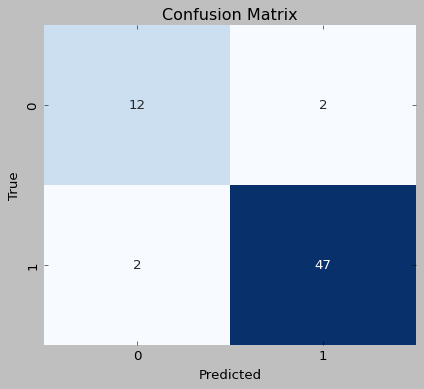

In [212]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
confusion_matrix_lr = confusion_matrix(y_test, pred)
print("Confusion Matrix for Logistic Regression: \n", confusion_matrix_lr)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))


Accuracy: 0.8412698412698413


Confusion Matrix for Decision Tree Classifier: 
 [[ 9  5]
 [ 5 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.90      0.90      0.90        49

    accuracy                           0.84        63
   macro avg       0.77      0.77      0.77        63
weighted avg       0.84      0.84      0.84        63



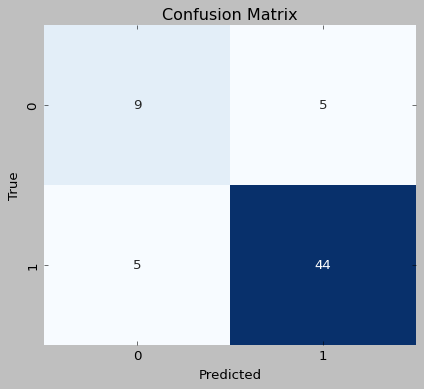

In [214]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Classifier: \n", confusion_matrix_dt)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred_dt))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classifier

In [215]:
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred_rt=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rt))

Accuracy: 0.9206349206349206


Confusion Matrix for Random Forest Classifier: 
 [[11  3]
 [ 2 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.94      0.96      0.95        49

    accuracy                           0.92        63
   macro avg       0.89      0.87      0.88        63
weighted avg       0.92      0.92      0.92        63



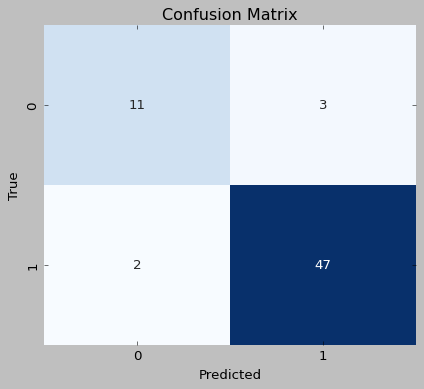

In [216]:
confusion_matrix_rt = confusion_matrix(y_test, y_pred_rt)
print("Confusion Matrix for Random Forest Classifier: \n", confusion_matrix_rt)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred_rt))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_rt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM: Support Vector Machine

In [217]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


## Metrices for SVM

Confusion Matrix:
 [[12  2]
 [ 3 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.96      0.94      0.95        49

    accuracy                           0.92        63
   macro avg       0.88      0.90      0.89        63
weighted avg       0.92      0.92      0.92        63

Accuracy: 0.9206349206349206


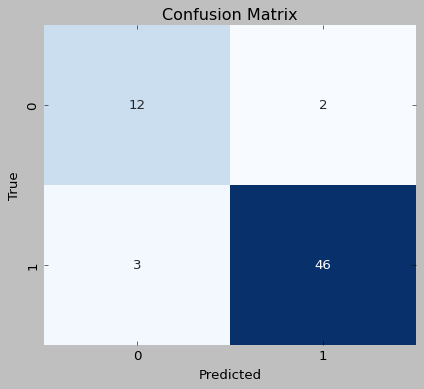

In [218]:
confusion_matrix_svc = confusion_matrix(y_test,y_pred_svc)
print("Confusion Matrix:\n",confusion_matrix_svc)
print("Classification Report:\n",classification_report(y_test,y_pred_svc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optimizing SVM Model with Grid Search

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [221]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [222]:
grid.fit(X_train,y_train) # fitting the model

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.690 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.655 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.655 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.655 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.679 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.690 total time=   0.0s


[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.655 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.655 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.655 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.679 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.690 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.655 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.655 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.655 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.679 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.690 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.655 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.655 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [223]:
grid.best_estimator_    # best estimator foe svm

SVC(C=100, gamma=0.001)

In [224]:
grid_pred = grid.predict(X_test)  # predicting target using best estimator

## Metrices for optimised SVM Model

Accuracy: 0.9365079365079365
Confusion Matrix:
 [[12  2]
 [ 2 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        49

    accuracy                           0.94        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.94      0.94      0.94        63



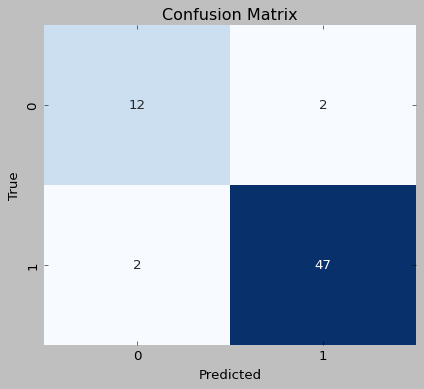

In [225]:
print("Accuracy:",metrics.accuracy_score(y_test, grid_pred))
confusion_matrix_svc_grid = confusion_matrix(y_test,grid_pred)
print("Confusion Matrix:\n",confusion_matrix_svc_grid)
print("Classification Report:\n",classification_report(y_test,grid_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_svc_grid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Voting classifier

In [226]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc),('random_forest', rt)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('svc', SVC(kernel='linear')),
                             ('random_forest', RandomForestClassifier())])

In [227]:
y_pred_voting = voting_clf.predict(X_test) # predict using voting classifier

## Metrices for Voting Classifier

In [228]:
# Predict using the trained voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Calculate evaluation metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

# Display the evaluation metrics
print(f"Voting Classifier Metrics:")
print(f"Accuracy: {accuracy_voting}")
print(f"Precision: {precision_voting}")
print(f"Recall: {recall_voting}")
print(f"F1-Score: {f1_voting}")


Voting Classifier Metrics:
Accuracy: 0.9523809523809523
Precision: 0.9541666666666666
Recall: 0.9523809523809523
F1-Score: 0.9529565114350043


Confusion Matrix:
 [[13  1]
 [ 2 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.98      0.96      0.97        49

    accuracy                           0.95        63
   macro avg       0.92      0.94      0.93        63
weighted avg       0.95      0.95      0.95        63



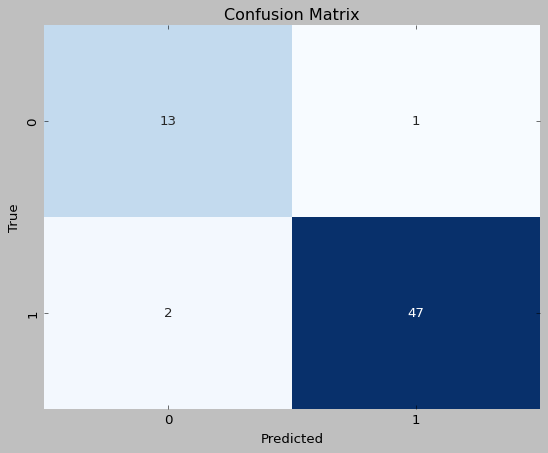

In [229]:
confusion_matrix_v = confusion_matrix(y_test,y_pred_voting)
print("Confusion Matrix:\n",confusion_matrix_v)
print("Classification Report:\n",classification_report(y_test,y_pred_voting))

sns.heatmap(confusion_matrix_v, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

- We used 4 Model Logistic Regression, Decision Tree,  Random Forest and SVM to predict the probability of a student getting placed. WE also used Voting Classifier on all models.
- Optimised SVM Model have highest Accuracy of approx 94% while Voting Classifier is closed to it with 92% Accuracy